<a href="https://colab.research.google.com/github/Selvalaxs21/EDA_Project/blob/main/EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('Clean_Dataset.csv')

In [25]:
#print first five rows of data
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


In [26]:
#print last five rows of data
data.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
104211,104211,AirAsia,I5-1780,Bangalore,Early_Morning,one,Morning,Kolkata,Economy,6.83,13.0,5176.0
104212,104212,AirAsia,I5-1562,Bangalore,Afternoon,one,Night,Kolkata,Economy,7.50,13.0,5176.0
104213,104213,AirAsia,I5-741,Bangalore,Morning,one,Evening,Kolkata,Economy,8.17,13.0,5176.0
104214,104214,AirAsia,I5-749,Bangalore,Night,one,Early_Morning,Kolkata,Economy,8.75,13.0,5176.0
104215,104215,AirAsia,I5-2461,Bangalore,Evening,one,Late_Night,Kolkata,Econo,NaN,NaN,NaN


In [ ]:
#Cleaning the data for missing values, null values
data.isnull().sum()



,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,1


In [ ]:
data.dropna(inplace=True)

In [ ]:
#Remove IN-DATA 'index' column
if 'index' in data.columns:
  data.drop(column=[index], inplace=True)


In [ ]:
#info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104215 entries, 0 to 104214
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        104215 non-null  int64  
 1   airline           104215 non-null  object 
 2   flight            104215 non-null  object 
 3   source_city       104215 non-null  object 
 4   departure_time    104215 non-null  object 
 5   stops             104215 non-null  object 
 6   arrival_time      104215 non-null  object 
 7   destination_city  104215 non-null  object 
 8   class             104215 non-null  object 
 9   duration          104215 non-null  float64
 10  days_left         104215 non-null  float64
 11  price             104215 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 10.3+ MB


In [ ]:
#descripition about the data
data.describe()

,Unnamed: 0,duration,days_left,price
count,104215.000000,104215.000000,104215.000000,104215.000000
mean,52107.000000,10.938732,25.725769,6384.752857
std,30084.423489,7.049259,13.693970,3678.470738
min,0.000000,1.170000,1.000000,1890.000000
25%,26053.500000,5.750000,14.000000,4028.000000
50%,52107.000000,9.500000,26.000000,5547.000000
75%,78160.500000,14.750000,38.000000,7484.000000
max,104214.000000,41.580000,49.000000,40354.000000


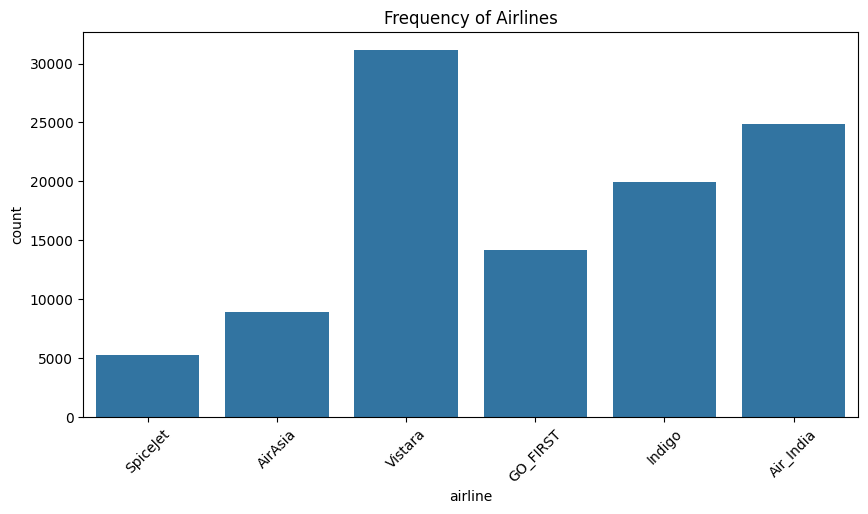

In [ ]:
#VISUALIZATION
#1.Airline in the dataset
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='airline')
plt.title('Frequency of Airlines')
plt.xticks(rotation=45)
plt.show()

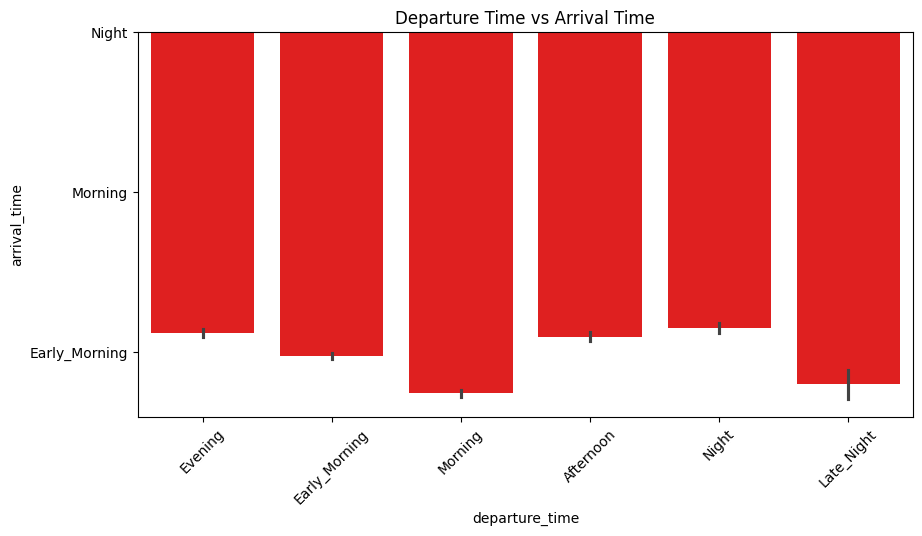

In [ ]:
#2.Departure Time Against Arrival Time
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='departure_time', y='arrival_time',color='red')
plt.title('Departure Time vs Arrival Time')
plt.xticks(rotation=45)
plt.show()

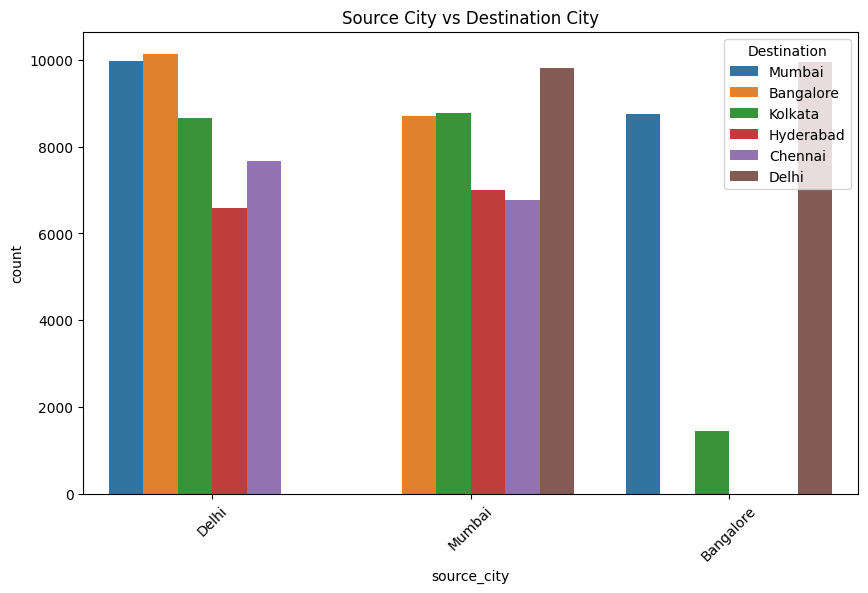

In [ ]:
#3.Source City Against Destination City
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='source_city', hue='destination_city')
plt.title('Source City vs Destination City')
plt.xticks(rotation=45)
plt.legend(title='Destination')
plt.show()

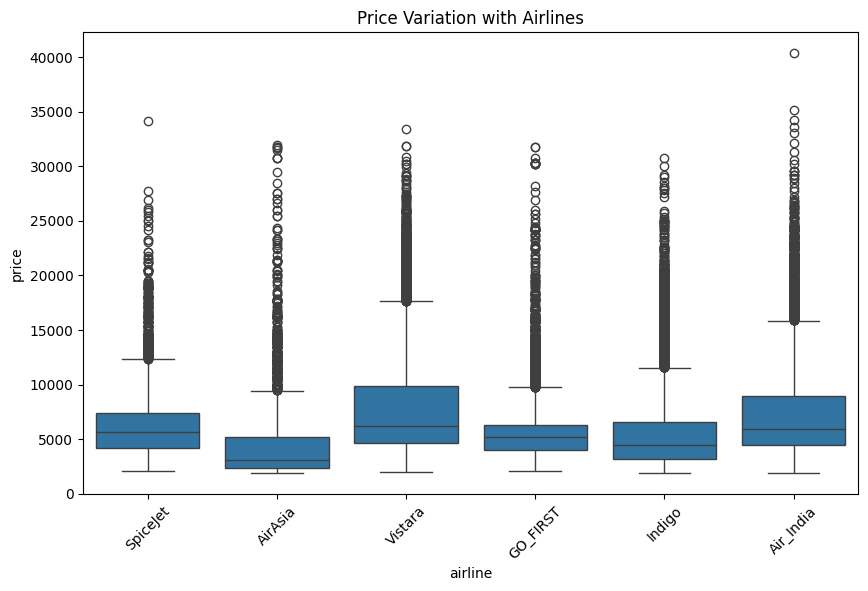

In [ ]:
#4.Price Variation with Airlines
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='airline', y='price')
plt.title('Price Variation with Airlines')
plt.xticks(rotation=45)
plt.show()

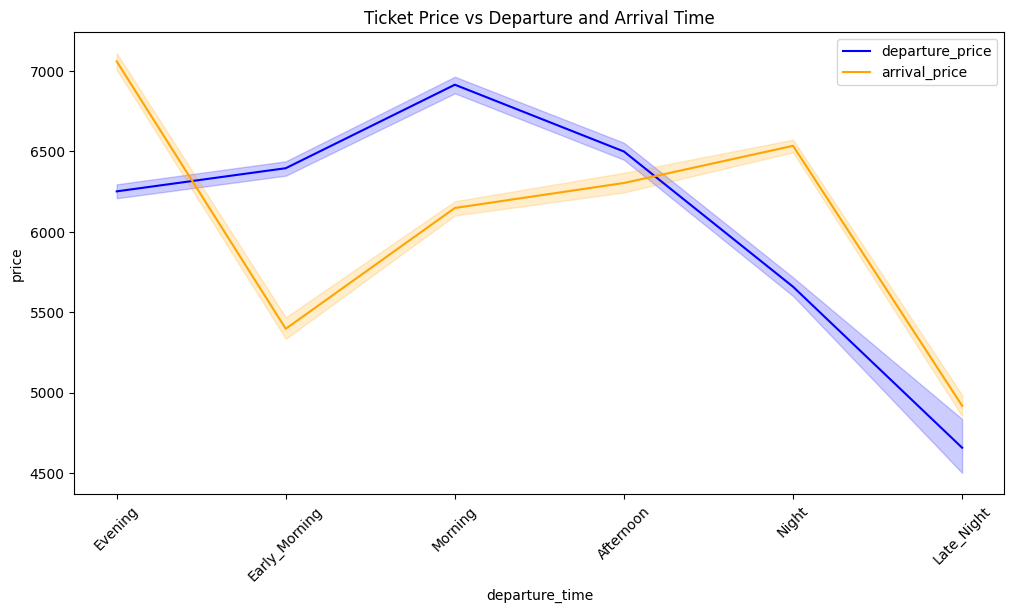

In [ ]:
#5.Ticket Price vs Departure and Arrival Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='departure_time', y='price', label='departure_price', color='blue')
sns.lineplot(data=data, x='arrival_time', y='price', label='arrival_price', color='orange')
plt.title('Ticket Price vs Departure and Arrival Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

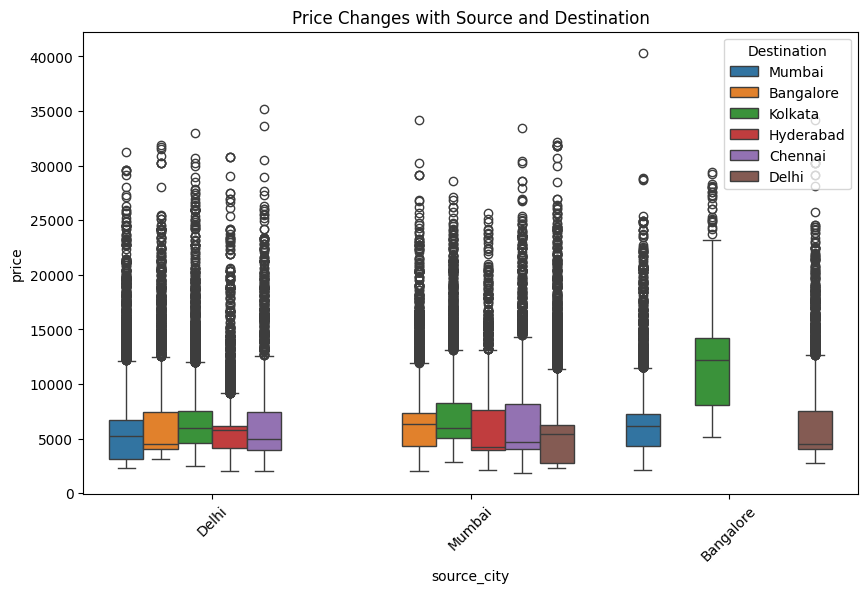

In [ ]:
#6.Price changes with Source and Destination
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='source_city', y='price', hue='destination_city')
plt.title('Price Changes with Source and Destination')
plt.xticks(rotation=45)
plt.legend(title='Destination')
plt.show()

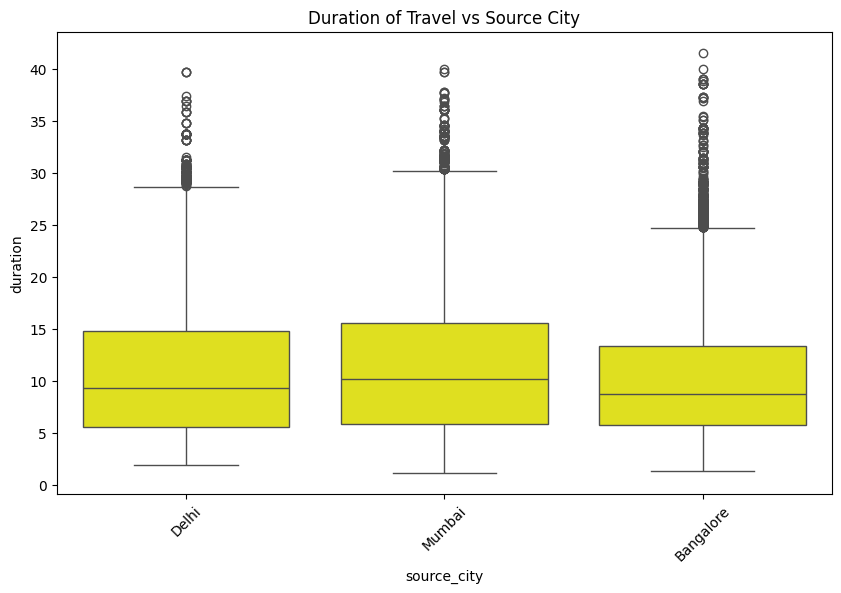

In [ ]:
#7.Duration of travel vs city
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='source_city', y='duration',color='yellow')
plt.title('Duration of Travel vs Source City')
plt.xticks(rotation=45)
plt.show()


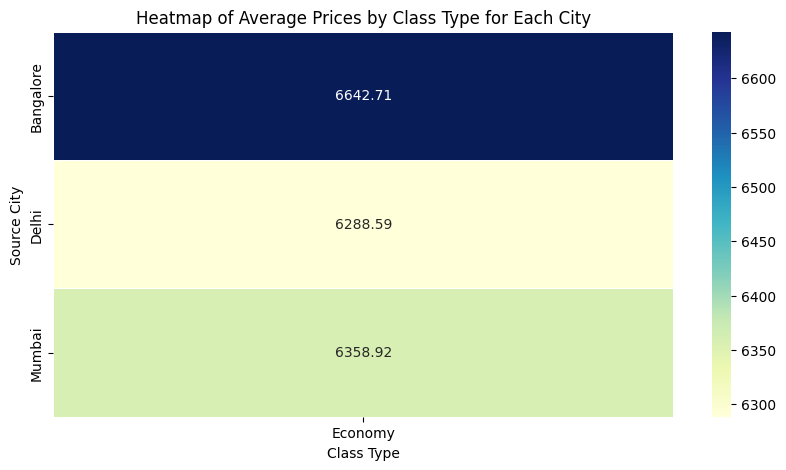

In [ ]:
#8.High price with class type for city
average_price = data.groupby(['source_city', 'class'])['price'].mean().unstack()
plt.figure(figsize=(10, 5))
sns.heatmap(average_price, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Average Prices by Class Type for Each City')
plt.xlabel('Class Type')
plt.ylabel('Source City')
plt.show()